<a href="https://colab.research.google.com/github/parthatom/HeartDiseaseClassification/blob/master/UnsupervisedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Unzip Data

In [172]:
!unzip /content/drive/"My Drive"/Data/satellite-images-hurricane-damage.zip -d data

Archive:  /content/drive/My Drive/Data/satellite-images-of-hurricane-damage.zip
  inflating: data/test/damage/-93.548123_30.900623.jpeg  
  inflating: data/test/damage/-93.560128_30.894917.jpeg  
  inflating: data/test/damage/-93.578271_30.779923999999998.jpeg  
  inflating: data/test/damage/-93.590598_30.694956.jpeg  
  inflating: data/test/damage/-93.604017_30.793719.jpeg  
  inflating: data/test/damage/-93.6141_30.754263.jpeg  
  inflating: data/test/damage/-93.618483_30.730039.jpeg  
  inflating: data/test/damage/-93.65613_30.076164000000002.jpeg  
  inflating: data/test/damage/-93.658785_30.206929.jpeg  
  inflating: data/test/damage/-93.659161_30.202384999999996.jpeg  
  inflating: data/test/damage/-93.65936500000001_30.138793.jpeg  
  inflating: data/test/damage/-93.659805_30.138094.jpeg  
  inflating: data/test/damage/-93.660431_30.20485.jpeg  
  inflating: data/test/damage/-93.661241_30.212164.jpeg  
  inflating: data/test/damage/-93.66200400000001_30.201602.jpeg  
  inflating

### Imports

In [0]:
import torch
import torchvision
import sys
import os
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from pathlib import Path
import sklearn
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

In [0]:
from sklearn import model_selection
from sklearn.cluster import MiniBatchKMeans
import torchvision.transforms as transforms

In [0]:
data_path = Path('/','content','data')
train_path = Path(data_path, 'train_another')
test_path =  Path(data_path,'test_another')
validation_path =  Path(data_path,'validation_another')

In [178]:
print(len(os.listdir(os.path.join(train_path,"damage"))), len(os.listdir(os.path.join(test_path, "damage"))), len(os.listdir(os.path.join(validation_path,"damage"))) )
print(len(os.listdir(os.path.join(train_path,"no_damage"))), len(os.listdir(os.path.join(test_path, "no_damage"))), len(os.listdir(os.path.join(validation_path,"no_damage"))) )

5000 8000 1000
5000 1000 1000


## Heart Disease Classification

### Data

In [0]:
df_train = pd.read_csv(os.path.join(data_path,"heart.csv"))
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df_train['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
pos = df_train[df_train['target']==1]
total_male_pos = len(pos[pos['sex']==1])
neg = df_train[df_train['target']==0]
total_male_neg = len(neg[neg['sex']==1])
print(total_male_neg, total_male_pos)
pos = df_train[df_train['target']==1]
total_female_pos = len(pos[pos['sex']==0])
neg = df_train[df_train['target']==0]
total_female_neg = len(neg[neg['sex']==0])
print(total_female_neg, total_female_pos)

114 93
24 72


In [0]:
df = df_train.copy()
df = df.drop(['target'], axis = 1)

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
      if(feature_name == 'sex'):
        pass
      else:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
df = normalize(df)

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df,df_train['target'].values, test_size = 0.4, shuffle = True, random_state = 42)

In [0]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
284,0.666667,1,0.0,0.433962,0.184932,0.0,0.0,0.511450,1.0,0.306452,1.0,0.25,1.000000
198,0.687500,1,0.0,0.245283,0.321918,0.0,0.5,0.213740,1.0,0.290323,0.5,0.50,1.000000
42,0.333333,1,0.0,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667
17,0.770833,0,1.0,0.528302,0.228311,0.0,0.5,0.328244,0.0,0.419355,0.0,0.00,0.666667
168,0.708333,1,0.0,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000


In [0]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.528646,0.680147,0.324755,0.346941,0.273654,0.147059,0.270221,0.605607,0.323529,0.168050,0.707721,0.183824,0.769608
std,0.190133,0.467279,0.340525,0.157322,0.117300,0.354817,0.264008,0.168366,0.468685,0.186033,0.303812,0.259924,0.204559
min,0.000000,0.000000,0.000000,0.000000,0.011416,0.000000,0.000000,0.129771,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390625,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.511450,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.259132,0.000000,0.500000,0.633588,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.337900,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,0.924528,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train.iloc[0].values

array([0.66666667, 1.        , 0.        , 0.43396226, 0.18493151,
       0.        , 0.        , 0.51145038, 1.        , 0.30645161,
       1.        , 0.25      , 1.        ])

### KMeans

In [0]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 42)
kmeans = model.fit(X_train)
y_pred_train = kmeans.labels_
y_pred_test = kmeans.predict(X_test)
train_accuracy = np.mean((y_pred_train == y_train).astype('float32'))
test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
print(f'train accuracy {train_accuracy*100:.3f}')
print(f'test accuracy {test_accuracy*100:.3f}')

train accuracy 72.059
test accuracy 70.968


In [0]:
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [0]:
transform_train = model.transform(X_train)
transform_train.shape

(272, 2)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['y', 'r']

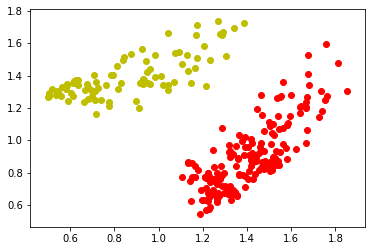

In [0]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_pred_train[i]])
plt.show()

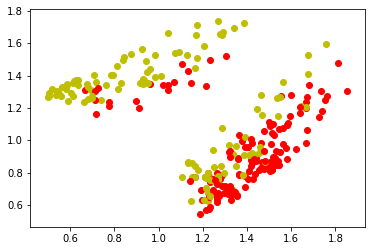

In [0]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_train[i]])
plt.show()

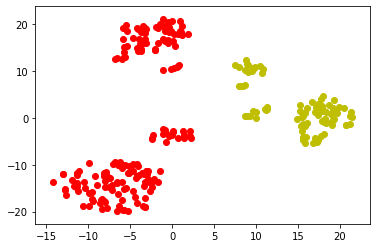

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42).fit_transform(X_train)
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_pred_train[i]])
plt.show()

In [0]:
tsne.shape

(272, 2)

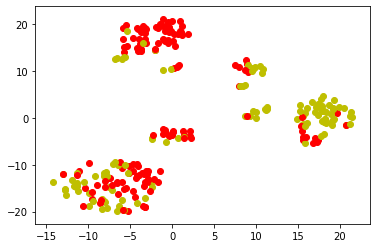

In [0]:
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_train[i]])
plt.show(y_pred_train = kmeans.labels_)

In [0]:
len(X_train.columns)

13

In [0]:
class dataset(Dataset):
  def __init__(self,df,y):
    self.df = df
    self.y = y
    self.indices = self.df.index
  def __len__(self):
    return len(self.df)
  def __getitem__(self,index):
    feature_vec = torch.from_numpy(self.df.iloc[self.indices(index)].values)
    target = self.y[index]
    return (feature_vec, target)

In [0]:
class AutoEncoder(nn.Module):
  
  def __init__(self):
    super(AutoEncoder,self).__init__()
    self.encoder = nn.Sequential(nn.Linear(13,5),nn.ReLU(),nn.Linear(5,2),nn.ReLU())
    self.decoder = nn.Sequential(nn.Linear(2,5),nn.ReLU(),nn.Linear(5, 13),nn.ReLU())
    self.encoding = torch.rand((2,5)) 
  
  def get_encoding(self,x):
    b = self.forward(x)
    return self.encoding

  def forward(self, x):
    self.encoding = self.encoder(x)
    x = self.decoder(self.encoding)
    return x

In [0]:
model = AutoEncoder()

In [248]:
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=2, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=13, bias=True)
    (3): ReLU()
  )
)


In [0]:
train_data = dataset(X_train, y_train)
test_data = dataset(X_test, y_test)

In [0]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = True)

In [0]:
X_train.values.astype('float')

array([[0.66666667, 1.        , 0.        , ..., 1.        , 0.25      ,
        1.        ],
       [0.6875    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.33333333, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.35416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667]])

In [0]:
epochs = 10
alpha = [0.001]
loss_lists = []
val_loss_lists = []
criterion = nn.MSELoss()
for lr in alpha:
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  for e in range(epochs):
    loss_list = []
    val_losses = []
    running_loss = 0
    model.train()
    X = torch.from_numpy(X_train.values.astype('float32')).to(device)
    y = X
    ps = model(X)
    loss = criterion(ps, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
        
    with torch.no_grad():
      model.eval()          
      valing_loss = 0
      X_val = torch.from_numpy(X_test.values.astype('float32')).to(device)
      y = X_val
      ps = model(X_val)
      valloss = criterion(ps,y)
      valing_loss += valloss.item()
      val_losses.append(valing_loss)
      loss_list.append(running_loss)
      print(f"Epoch: {e+1}/{epochs}...")
      print(f"Training loss: {running_loss/len(X):.3f}")
      print(f"Validation loss: {valing_loss/len(X):.3f}")        
  loss_lists.append(loss_list)
  val_loss_lists.append(val_losses)

Epoch: 1/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 2/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 3/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 4/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 5/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 6/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 7/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 8/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 9/10...
Training loss: 0.001
Validation loss: 0.001
Epoch: 10/10...
Training loss: 0.001
Validation loss: 0.001


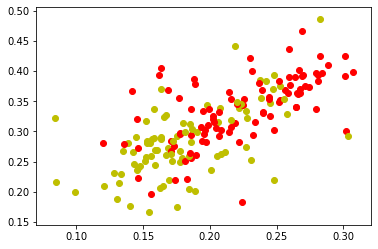

In [0]:
X = torch.from_numpy(X_train.values.astype('float32'))
encoding_train = model.get_encoding(X).detach().numpy()
for i in range(len(encoding_train)):
  plt.scatter(encoding_train[i][0], encoding_train[i][1], c=colors[y_train[i]])
plt.show()

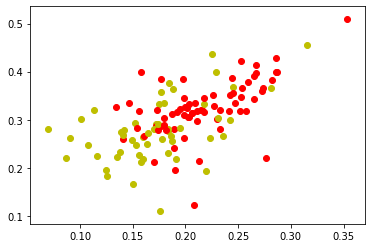

In [0]:
X_val = torch.from_numpy(X_test.values.astype('float32'))
encoding_val = model.get_encoding(X_val).detach().numpy()
for i in range(len(encoding_val)):
  plt.scatter(encoding_val[i][0], encoding_val[i][1], c=colors[y_test[i]])
plt.show()

## Satellite Image Hurricane Damage

### Loading Data

In [0]:
train_data = torchvision.datasets.ImageFolder(train_path, transform=transforms.ToTensor())
val_data = torchvision.datasets.ImageFolder(validation_path, transform=transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size =32, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 32, shuffle = True)

In [0]:
train_data_kmeans = torchvision.datasets.ImageFolder(train_path, transform=transforms.Compose([transforms.ToTensor(),
                                                                                              transforms.Lambda(flatten)]))
val_data_kmeans = torchvision.datasets.ImageFolder(validation_path, transform=transforms.Compose([transforms.ToTensor(),
                                                                                                transforms.Lambda(flatten)]))
train_loader_kmeans = DataLoader(train_data, batch_size = 32, shuffle = True)
val_loader_kmeans = DataLoader(val_data, batch_size = 32, shuffle = True)

In [0]:
def flatten(tensor):
  return tensor.resize(-1,1)

torch.Size([1, 3, 128, 128]) tensor([1])


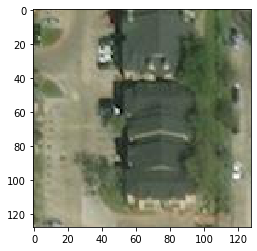

In [201]:
%matplotlib inline
image, label = next(iter(train_loader))
trans = transforms.ToPILImage()
print(image.shape, label)
img = trans(image[0])
plt.imshow(img)

In [233]:
image, label = next(iter(train_loader_kmeans))
print(image.view(-1,3*128*128).shape, label)
model = MiniBatchKMeans(n_clusters = 2, random_state = 42, batch_size = 32)
kmeans = model.partial_fit(image.view(-1,3*128*128))
y_pred_train = (kmeans.labels_)
# y_pred_train
torch.mean((torch.from_numpy(y_pred_train) == label).type(torch.FloatTensor))

torch.Size([32, 49152]) tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 1])


tensor(0.5312)

### K Means Clustering

In [0]:
accuracy_list = []
model = KMeans(n_clusters = 2, random_state = 42)
for i,(img, label) in enumerate(train_loader_kmeans):
  X  = img.view(-1,3*128*128)
  kmeans = model.fit(X)
  # y_pred_test = kmeans.predict(X_test)
  train_accuracy = torch.mean((torch.from_numpy(kmeans.labels_) == label).type(torch.FloatTensor))
  # print(train_accuracy)
  accuracy_list.append(train_accuracy)
# test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
# print(f'train accuracy {train_accuracy*100:.3f}')
# print(f'test accuracy {test_accuracy*100:.3f}')

In [0]:
accuracy_list = []
model = MiniBatchKMeans(n_clusters = 2, random_state = 42, batch_size = 32)
for i,(img, label) in enumerate(train_loader_kmeans):
  X  = img.view(-1,3*128*128)
  kmeans = model.partial_fit(X)
  # y_pred_test = kmeans.predict(X_test)
  train_accuracy = torch.mean((torch.from_numpy(kmeans.labels_) == label).type(torch.FloatTensor))
  # print(train_accuracy)
  accuracy_list.append(train_accuracy)
# test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
# print(f'train accuracy {train_accuracy*100:.3f}')
# print(f'test accuracy {test_accuracy*100:.3f}')

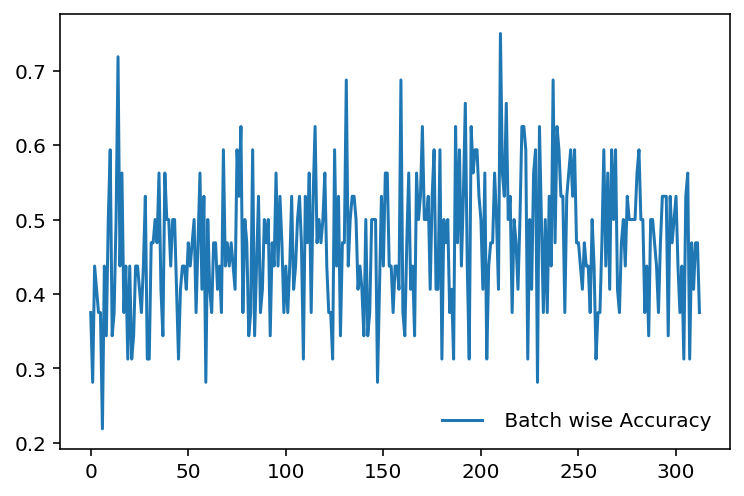

In [236]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(accuracy_list, label=' Batch wise Accuracy')
plt.legend(frameon=False)

In [238]:
torch.max(torch.FloatTensor(accuracy_list))

tensor(0.7500)

In [239]:
torch.min(torch.FloatTensor(accuracy_list))

tensor(0.2188)

In [240]:
torch.mean(torch.FloatTensor(accuracy_list))

tensor(0.4663)

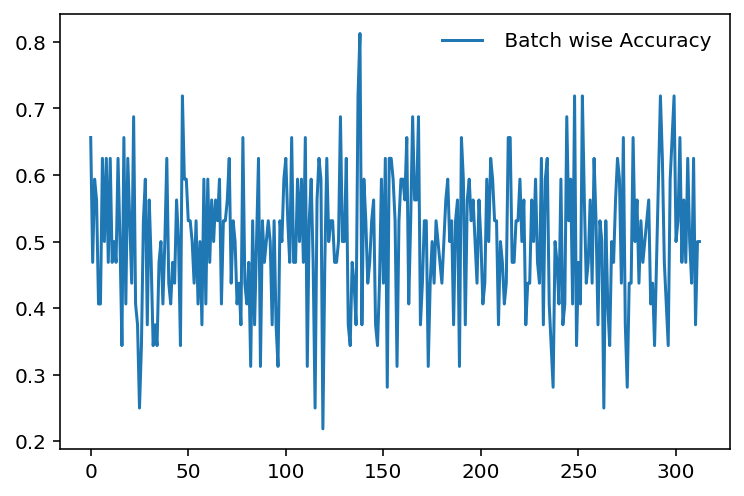

In [242]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(accuracy_list, label=' Batch wise Accuracy')
plt.legend(frameon=False)

In [243]:
torch.max(torch.FloatTensor(accuracy_list))

tensor(0.8125)

In [244]:
torch.min(torch.FloatTensor(accuracy_list))

tensor(0.2188)

In [245]:
torch.mean(torch.FloatTensor(accuracy_list))

tensor(0.5015)